# **Diamond Prices Data Analysis**

When judging the value of a diamond, gem experts follow the "4Cs" criteria, where they analyze 4 attributes of a diamond: Cut, Color, Clarity and Carat Weight. 

To confirm how these attributes contribute to a diamond's worth, this project will examine [Diamond Price Data](https://www.kaggle.com/datasets/shivam2503/diamonds?resource=download) found through kaggle. This dataset was chosen as it has sampled a large amount of diamonds along with each diamond's price, cut, color, clarity and carat weight.

The following sections are outlined as follows: <br>
-   [Cleaning the Data](#Cd)
-   [Descriptive Analysis](#Ds)
    -   [A. Cut Quality](#A)
    -   [B. Color](#C)
    -   [C. Clarity](#Cc)
    -   [D. Carat Weight](#Cw)
-   [Inferential Analysis](#Ia)
-   [Summary and Conclusion](#Sc)

<a id='Cd'></a>
## **Cleaning The Data** 

In [1]:
# Importing Modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading in Dataset
df = pd.read_csv("diamonds.csv")

In [3]:
# Printing first four values
df.head()

,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# Printing last four values
df.tail()

,index,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
# General stats from our set
df.describe()

,index,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<a id='Ds'></a>
## **Descriptive Analysis**

<a id='A'></a>
#### **A. Cut Quality:** 

Arguably the most important of the "4Cs" is the quality of the cut. While the cut of a diamond refers to both it's shape and the skill with which it has been carved into the gemstone, we will be focus only on the quality of each diamond's cut.

Our dataset categorizes a diamond's quality of cut into one of five categories: "Fair", "Good", "Very Good", "Premium" and "Ideal", with "Fair" being the lowest quality and "Ideal" being the highest quality. After seeing this, it would only be natural to think that diamonds with a higher cut quality would have a higher price. To answer this we can start by finding the distribution of the Cut Quality among the diamonds:

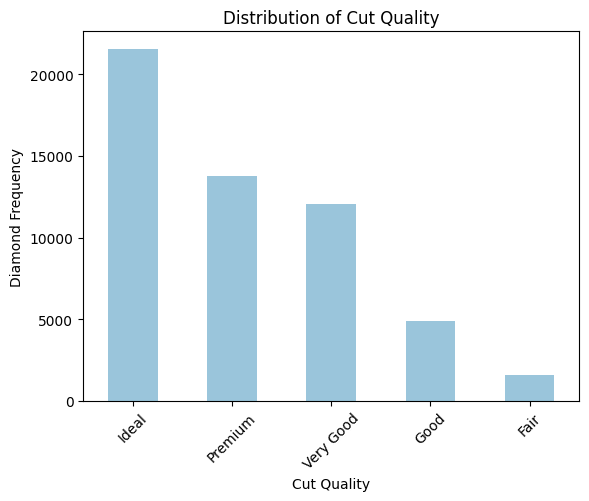

In [6]:
df["cut"].value_counts().plot(kind = "bar", color = "#9ac5db")
plt.xlabel("Cut Quality")
plt.ylabel("Diamond Frequency")
plt.xticks(rotation=45)
plt.title("Distribution of Cut Quality")
plt.show()

-   "Ideal" contains the largest amount of diamond frequency, with **40%** of the diamonds having an "Ideal" cut.
-   The next two most highly represented Cut Qualities, composed of "Premium" and "Very Good" cut diamonds account for **48%** of the dataset.
-   The two least represented Cut Qualities, composed of "Good" and "Fair" cut diamonds only account for **12%** of the dataset.

Now let's look the distribution of each type of Cut Quality with respect to the pricing of the diamonds.

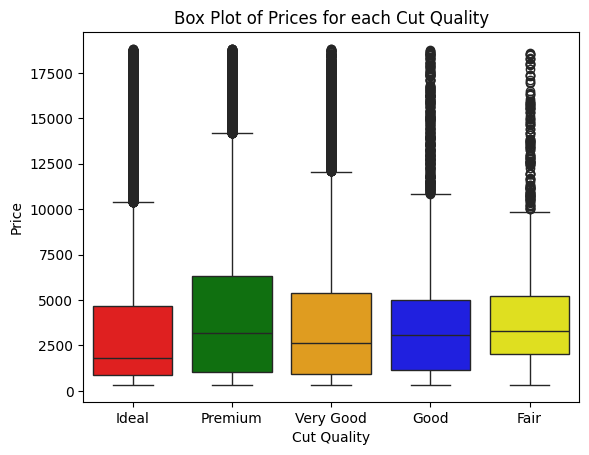

In [7]:
cut_order = ["Ideal", "Premium", "Very Good", "Good", "Fair"]
custom_palette = ["Red", "Green", "Blue", "Orange", "Yellow"] 
sns.boxplot(x = "cut", y = "price", data=df, palette=custom_palette, hue="cut", legend=False, order = cut_order)
plt.xlabel("Cut Quality")
plt.ylabel("Price")
plt.title("Box Plot of Prices for each Cut Quality")
plt.show()

Notice that all the boxes display right-skewness, as they all have their medians closer to the bottom of their boxes, and have a longer top whisker. This means that each type of cut has majority of it's diamonds at lower prices. If a diamond's cut quality has a high influence on a diamond's price, than the boxes for the higher qualities would display left skewness, however that is not the case here. <br>

Recall that "Ideal" and "Premium" have a large diamond frequency, and that they were the highest qualities of cut a diamond can have. This tells us that in general, diamonds with a higher cut quality don't necessarily have a higher price. This does not mean that the quality of the cut has no importance on a diamond's worth, but rather that one of the other attributes has a larger influence on a diamond's price. 

<a id='C'></a>
#### **B. Color:**

The next criteria is a diamond's color. Diamonds are transparent, but poor quality diamonds tend to look noticeably yellowish. The scale experts use to judge a diamond's color are from D to Z: where the best color grade is D, indicating the diamond is colorless, and the worst grade is Z, indicating the diamond is very yellow. However for the purposes of this project, we will look only at colors: D to J. <br>

So perhaps diamonds with higher color grades will have higher prices, like before we can answer this by finding the distribution of the color grades, and the distribution of each color grade with respect to the diamond prices:

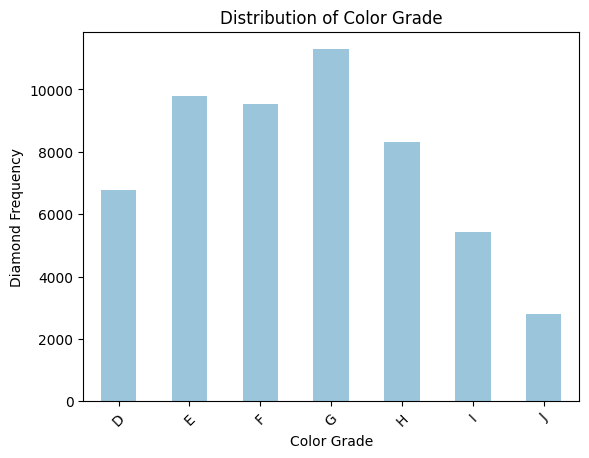

In [8]:
df["color"].value_counts().sort_index().plot(kind = "bar", color = "#9ac5db")
plt.xlabel("Color Grade")
plt.ylabel("Diamond Frequency")
plt.xticks(rotation=45)
plt.title("Distribution of Color Grade")
plt.show()

-   Diamonds with color grade "G" appear the most in our dataset, accounting for **21%** of our dataset.
-   Diamonds with color grade "E", "F" and "H" are the next three most highly represented Color Grades, accounting for **50%** of the dataset. 
-   Diamonds with color grade "D", "I", and "J" are the three least represented Color Grades, only accounting for **29%** of the dataset.

Next let's look at the distribution of each color grade with respect to the pricing of the diamonds.

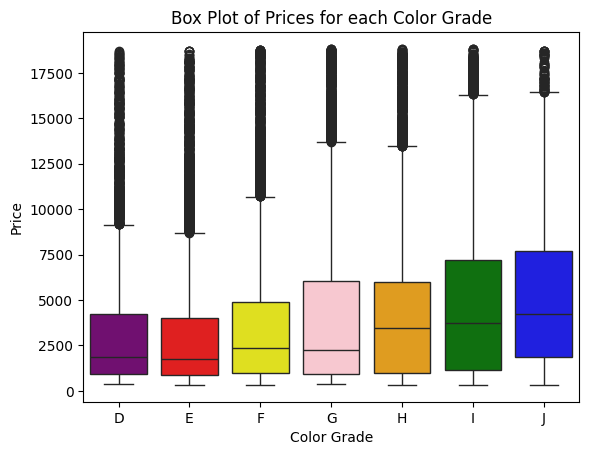

In [9]:
color_order = ["D", "E", "F", "G", "H", "I", "J"]
custom_palette = ["Red", "Green", "Blue", "Orange", "Yellow", "Pink", "Purple"] 
sns.boxplot(x = "color", y = "price", data=df, palette=custom_palette, hue="color", legend=False, order = color_order)
plt.xlabel("Color Grade")
plt.ylabel("Price")
plt.title("Box Plot of Prices for each Color Grade")
plt.show()

Just like before, all the boxes display right skewness, as their medians are closer to the bottom of the box and have longer top whiskers. This tells us that every color grade has most of it's diamonds at lower prices, even the higher grades. <br>

Recall that the scale is from D to Z, and we are just analyzing grades D to J, so if a diamond's color has a high influence on it's price, then all the boxes should display left-skewness to some degree. At the very least, color grades: "G" and "E" should display left-skewness, as they have the highest amount of diamond frequencies and are higher color grades on the scale. <br>

So in general, diamonds with a higher color grade don't necessarily have a higher price. Once again, this does not mean that the color has no importance on a diamond's worth, but rather that one of the other attributes has a larger influence on a diamond's price. 

<a id='Cc'></a>
#### **C. Clarity:**

The third criteria a diamond is judged on is it's clarity. Inside most diamonds, there are small mineral flecks or tiny fractures. These naturally occurring marks are called inclusions. The fewer inclusions a diamond has, the better its clarity. <br>

Diamond clarity is measured in the following units: "IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1", "I2", "I3", with "IF" being the clearest and "I3" being the least clear. However for the purposes of this project, we will exclude "I2" and "I3" from our analysis, as the dataset did not include any diamonds with these clarity units. <br>

An ideal clarity unit is between units "IF" and "SI2", as diamonds with these clarity units have no imperfections that are visible to the naked eye. Diamonds with clarity units "I1", "I2" and "I3" are less ideal as they will have imperfections that are noticeably visible.

So like before, we will check to see if higher clarities result in higher diamond prices. We can start by finding the distribution of clarity among the diamonds:

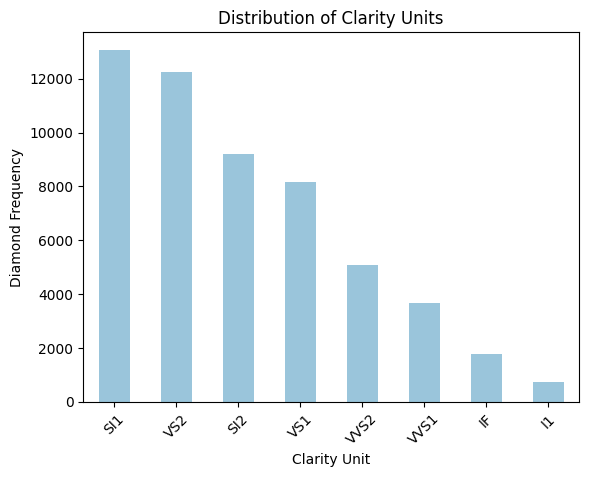

In [10]:
df["clarity"].value_counts().plot(kind = "bar", color = "#9ac5db")
plt.xlabel("Clarity Unit")
plt.ylabel("Diamond Frequency")
plt.xticks(rotation=45)
plt.title("Distribution of Clarity Units")
plt.show()

-   Diamonds with clarity units "SI1"and "VS2" are the most frequent, accounting for **24%** and **23%** of the dataset respectively. 
-   Diamonds with clarity units "SI2", "VS1", "VVS2" and "VVS1" are the next four most highly represented clarity units, accounting for **48%** of the data. 
-   Diamonds with clarity units "IF" and "I1"are the least represented clarity units, accounting for only **5%** of the data.

Next let's look at the distribution of each clarity unit with respect to the pricing of the diamonds.

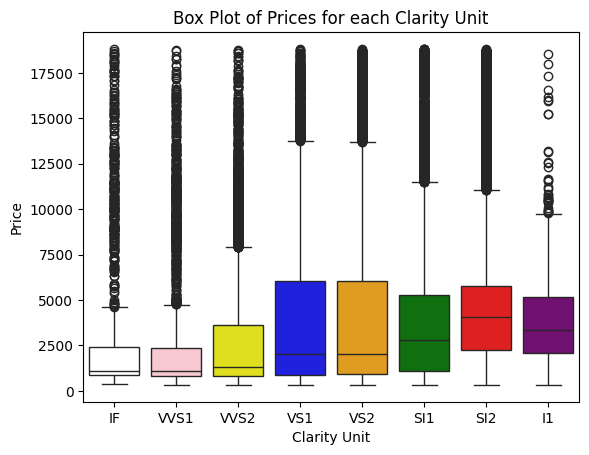

In [11]:
clarity_order = ["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"]
custom_palette = ["Red", "Green", "Blue", "Orange", "Yellow", "Pink", "Purple", "White"] 
sns.boxplot(x = "clarity", y = "price", data=df, palette=custom_palette, hue="clarity", legend=False, order = clarity_order)
plt.xlabel("Clarity Unit")
plt.ylabel("Price")
plt.title("Box Plot of Prices for each Clarity Unit")
plt.show()

For the same reasons as before, every clarity unit displays right skewness, which indicates that each clarity unit has majority of it's diamonds in the lower prices. <br>

Recall that the only clarity unit that is not ideal for a diamond here is "I1", the rest will not have any visible imperfections. If the clarity unit of a diamond had a high influence on it's price, then "SI1" and "VS2" should have demonstrated some left skewness as they have a high diamond frequency. <br>

Thus in general, diamonds with a higher clarity unit don't necessarily have a higher price. Like before, this does not mean that the clarity unit has no importance on a diamond's worth, but rather that another attribute has a larger influence on a diamond's price. 

<a id='Cw'></a>
#### **D. Carat Weight:**

A diamond's weight is measured in carats, the more carats there are, the bigger the diamond is. There are 100 points in each carat, so if a diamond weighs 100 points, it will be 1 carat in size. If it weighs 50 points, it will be 0.5 carats in size. This dataset has sampled diamonds with carat weights ranging from 0.2 to 5.01, and we can see the relationship between a diamond's carat weight and it's price by using a scatter plot:  

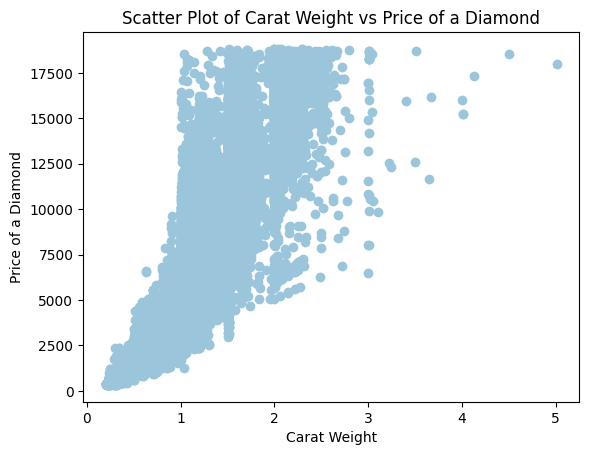

In [12]:
plt.scatter(df["carat"], df["price"], color = "#9ac5db")
plt.xlabel("Carat Weight")
plt.ylabel("Price of a Diamond")
plt.title("Scatter Plot of Carat Weight vs Price of a Diamond")
plt.show()

The scatter plot seems to show a mostly positive correlation, where the larger a diamond's carat weight is, the larger it's price is. The analysis for every other attribute has concluded that another attribute has a higher influence on a diamond's price, so perhaps a diamond's carat weight is the attribute that has the highest influence on a diamond's price. We can confirm this by applying inferential statistical techniques within the context of this dataset. 

<a id='Ia'></a>
## **Inferential Analysis**

We want to see if there exists a positive relationship between a diamond's carat weight and it's price. To do this, we need to perform a one-tailed t test on the correlation coefficient between the two groups: 

In [13]:
import scipy.stats

#### **Step 1. Null and Alternative Hypothesis:**

-   Null ***$H_{0}$***: There is no relationship between a diamond's carat weight and a diamond's price.  
    -   ***p*** = 0
-   Alternative ***$H_{a}$*** There is a positive relationship between a diamond's carat weight and a diamond's price.
    -   ***p*** > 0

#### **Step 2. Determining Significance Level:**

We will select $\alpha$ = 0.05.

#### **Step 3. Calculating Test Statistic:**

To calculate our t-test statistic, we first need to calculate the sample correlation coefficient between a diamond's carat weight and a diamond's price:

In [14]:
r = scipy.stats.pearsonr(df["carat"], df["price"], alternative='greater')[0]
print(r)

0.9215913011934768


We can now use this value to calculate our t-test statistic:

In [15]:
n = 54000 # Number of diamonds

t = (np.sqrt(n-2) * r) / (np.sqrt(1 - (r ** 2)))

print(t)

551.7147166880919


#### **Step 4. Find Critical Value and Rejection Region:**

We now need to find the rejection region, we start by finding our critical value:

In [16]:
t_critical = scipy.stats.t.ppf(1 - 0.05, n-2)
print(t_critical)

1.6448818464308776


Since we are doing a right-tailed test, our rejection region is: {choose $t_{*}$ such that $t_{*}$ > 1.6448}. 

#### **Step 5. Determine veracity of Null Hypothesis.** 

Our $t_{*}$ = 551, which is much larger than 1.6448, thus we reject our null hypothesis, and conclude that there is a positive relationship between a diamond's carat weight and a diamond's price.

<a id='Sc'></a>
## **Summary and Conclusion:**

In summary, a diamond has four attributes that are used to determine it's price: Cut Quality, Color Grade, Clarity Unit, and Carat Weight. While the data suggests the first three attributes don't have a high influence on a diamond's price, it does suggest that the fourth attribute: Carat Weight, does. This makes sense, as the bigger a diamond is, the higher it's price should be. <br>

However all four attributes play an important part in a diamond's price, if a diamond has a low Cut Quality, Color Grade or Clarity Unit, that will still negatively affect the diamond's price. <br>

It should be stated that the dataset is a bit limited, as it does not include diamonds with poor cut qualities, poor color grades or poor clarity units, while it does include diamonds with low carat sizes. So perhaps a dataset that does include these such diamonds could yield different results.